In [14]:
import requests
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from scipy import stats
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
data = requests.get(url)

In [15]:
data2 = np.array([d.split(',') for d in data.text.split('\n')[:-1]])

In [16]:
features = data2[:,2:-1].astype(float)

In [17]:
x1 = features[:,27]
x2 = features[:,0]
X = np.transpose((x1, x2))

In [18]:
target = data2[:,-1]
for i in range((target.size)):
  if target[i] == 'g':
    target[i] = 1
  elif target[i] == 'b':
    target[i] = 0
target = np.reshape(target,(351,))

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X,target)

SVC(C=10000000000.0, kernel='linear')

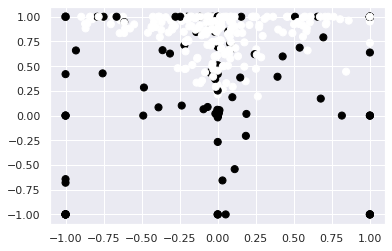

In [23]:
plt.scatter(x1, features[:,0],c=target,s=50, cmap='bwr')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1], 
                   s=300, linewidth=1, edgecolors = 'black', facecolors='none');
#                  s=300, marker='P', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

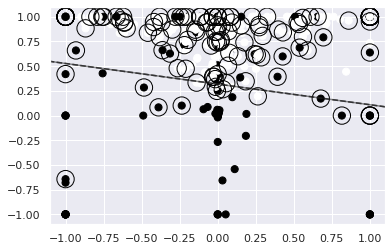

In [ ]:
plt.scatter(x1,x2,c=target,s=50, cmap='bwr')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_.size

252

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving ionosphere.csv to ionosphere (1).csv


In [ ]:
#cvs = pd.read_csv('ionosphere.csv')
#sphere = cvs.to_numpy()